<a href="https://colab.research.google.com/github/jeremymanning/mind_book/blob/master/content/models_of_text_and_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Models of text and language
Author: Jeremy R. Manning

MIND Summer School (2023)

Dartmouth College

## Background and overview

Natural language processing (NLP) is a branch of the field of [computational linguistics](https://en.wikipedia.org/wiki/Computational_linguistics).  The fundamental goal of NLP is to use computational approaches to process, analyze, and understand language.

In this tutorial, we'll experiment with two aspects of NLP:
  - Text embedding
  - Interactive agents (chatbots)



### Natural Language Processing of movie conversations?

The approaches covered below can be applied to virtually any text dataset-- stories, video or conversation transcripts, instruction manuals...you name it!  You can feel free to swap out your own preferred dataset and try out the approaches below.

As an illustrative example, today we'll apply NLP to a [movie dialogue dataset](https://convokit.cornell.edu/documentation/movie.html) from the [Cornell Conversational Analaysis Toolkit (ConvKit)](https://convokit.cornell.edu/).  ConvKit provides a set of nice tools for working with conversation data, along with some neat datasets.

<img src='https://media0.giphy.com/media/26h0pkvcgnFIpvU1a/giphy.gif'>

There's no particularly compelling reason for choosing this dataset over the thousands of other text corporate that are "out there" in the world.  But this one seemed passingly interesting, so here we are!

If you're looking for other text datasets, here are some good places to start:
  - [ConvKit datasets](https://github.com/CornellNLP/ConvoKit#datasets): lots of neat conversation-related datasets
  - [Hugging Face datasets](https://huggingface.co/datasets): tens of thousands of datasets of practically every shape, size, and theme.  Quality is variable across datasets, but there are *many* excellent datasets here.
  - [NLP Datasets](https://github.com/niderhoff/nlp-datasets): lots of interesting datasets.  A sampling: Amazon reviews, ArXiv, Enron emails, several social media datasets, several news datasets, and more!
  - [FiveThirtyEight Data](https://data.fivethirtyeight.com/): the data behind (most) FiveThirtyEight articles
  - [NYT Open](https://open.nytimes.com/data/home): lots of interesting datasets behind an assortment of New York Times articles

## Meet your friendly personalized Robo-TA 🤖!

Before we get started, check it out: this notebook has been augmented by incorporating an (experimental!) NLP tool, called [Chatify](https://github.com/ContextLab/chatify) for providing interactive assistance.  Chatify uses a [large language model](https://en.wikipedia.org/wiki/Large_language_model) to (attempt to) help you understand or explore any code cell in this notebook. **Disclaimer: Chatify may provide incorrect, misleading, and/or otherwise harmful responses.**

 If you want to use Chatify, add the `%%explain` magic command to the start of any code cell, and then run the cell (shift + enter). You can then select different options from the dropdown menus, depending on what sort of assistance you want. To disable Chatify and run the code as usual, simply delete the `%%explain` command and re-run the cell.  (If you *don't* want to use chatify, simply don't call the `%%explain` magic command.)

In [1]:
# @title Install [Davos](https://github.com/ContextLab/davos) for dependency management and code safety
%pip install -qqq davos
import davos
davos.config.suppress_stdout = True

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.5 MB/s eta 0:00:00


In [2]:
# @title Install and enable Chatify
smuggle chatify      # pip: git+https://github.com/ContextLab/chatify.git
%load_ext chatify

print('Chatify has been installed and loaded! 🤖')

Chatify has been installed and loaded! 🤖


# Text embedding models

[Text embedding models](https://en.wikipedia.org/wiki/Word_embedding) are concerned with deriving mathematical representations of the "meaning" of language.  Meanings are represented as [feature vectors](https://en.wikipedia.org/wiki/Feature_(machine_learning)) whose elements reflect (typically abstract) semantic properties.  The idea is that texts that convey similar meanings should have feature vectors that are "similar" (e.g., nearby in Euclidean distance, correlated, etc.).

One of the earliest text embedding models was [Latent Semantic Analysis (LSA)](https://en.wikipedia.org/wiki/Latent_semantic_analysis).  LSA is driven by a "word counts matrix" whose rows denote documents in a large corupus, and whose columns denote unique terms (e.g., the unique set of stemmed and lematized words in the corpus, excluding [stop words](https://en.wikipedia.org/wiki/Stop_word).).  The entries in the word counts matrix denote the number of times a given word (column) appears in a given document (row).  Applying [matrix factorization](https://en.wikipedia.org/wiki/Matrix_decomposition) to the word counts matrix yields a *documents matrix* (whose rows are documents and whose columsn are "concepts") and a *words matrix* (whose rows are concepts and whose columns are words).  In this way, we can think of each "concept" as being describable by a weighted blend of the meanings of the unique words in the model's vocabulary.  The rows of the documents matrix may be used as "embeddings" of the documents (where similar documents are represented by similar embedding vectors) and the columns of the words matrix may be used as "embeddings" of the words (where similar words are represented by similar embeddings).

Topic models like [Latent Dirichlet Allocation (LDA)](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) extended some of the fundamental ideas of LSA into a [generative model](https://en.wikipedia.org/wiki/Generative_model).  According to LDA, each "topic" (analogous to a "concept" in LSA) is a weighted blend of words in the model's vocabulary.  Also analogous to LSA, LDA posits that each "document" reflects a weighted blend of topics.  The main difference between LSA and LDA is that LDA provides a mechanism that allows each word to potentially take on several meanings dependings on how it is used in a given document.  For example, the word "bat" might reflect an animal, a piece of sporting equipment, something done with eyelashes, and so on.

[Word2vec](https://en.wikipedia.org/wiki/Word2vec) further extended the notion of word embeddings using one of the earliest [deep learning](https://en.wikipedia.org/wiki/Deep_learning) approaches to text embedding.  Like LSA and LDA, word2vec considers each word (from each document) independently, without regard for context or grammar (i.e., it is a so-called "[bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model)" model).

Most modern text embedding models incorporate some notion of word order effects, grammar, context, or other temporally varying signals. In addition to advances in the network archetectures of text embedding models, improvements in computing technology have enabled models to consider increasingly longer-duration and more complicated influences on meaning.  Whereas earlier context-sensitive models operated at scales of [individual sentences](https://en.wikipedia.org/wiki/Sentence_embedding), the most [recent models](https://en.wikipedia.org/wiki/Large_language_model) operate over scales on the order to many thousands of words (e.g., entire documents and sometimes even sequences of documents).  Today's best-performing text embedding models nearly all incorporate a network module called a [transformer](https://en.wikipedia.org/wiki/Transformer_(machine_learning_model)).  Transforms provide a means of generating representations of inputted text that reflect which words are present along with positional information.  Early transfomer-based models were used primarily for "sequence-to-sequence" tasks like [machine translation](https://en.wikipedia.org/wiki/Machine_translation), but their use has since grown to dominate the field of NLP.

In [3]:
# @title Set up and install dependencies

# data wrangling and scraping
smuggle numpy as np
smuggle pandas as pd
smuggle datawrangler as dw  # pip: pydata-wrangler[hf]
smuggle scipy.signal as signal
smuggle os
smuggle pickle
smuggle warnings
from convokit smuggle Corpus, download
from itertools smuggle chain

# NLP stuff
from langchain.llms smuggle LlamaCpp
from langchain smuggle PromptTemplate, LLMChain
from langchain.prompts smuggle SystemMessagePromptTemplate, HumanMessagePromptTemplate, ChatPromptTemplate
smuggle transformers
smuggle llama_cpp           # pip: llama-cpp-python
from huggingface_hub smuggle hf_hub_download

# general-purpose machine learning and stats libraries
smuggle sklearn as skl
smuggle scipy as sp
smuggle scipy.signal as signal

# data visualization
smuggle matplotlib as mpl
smuggle seaborn as sns
smuggle hypertools as hyp
from IPython.display import Markdown

print('External dependencies have been loaded and configured.')

External dependencies have been loaded and configured.


In [4]:
# @title Download the Movie-Dialogs corpus

corpus = Corpus(filename=download('movie-corpus'))
corpus.print_summary_stats()

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
default_backend: mem
Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


In [5]:
def get_conversation_md(x, include_speakers=True, include_text=True):
  characters = {id: x.get_speaker(id).meta['character_name'] for id in x.get_speaker_ids()}

  result = ''
  for utt in [x.get_utterance(u) for u in x.get_utterance_ids()]:
    next_line = ''

    speaker = utt.get_speaker().meta["character_name"]
    text = utt.text

    if include_speakers:
      next_line += f'**{speaker}'
      if include_text:
        next_line += ':'
      next_line += '**'
      if include_text:
        next_line += ' '
    if include_text:
      next_line += text

    if include_speakers or include_text:
      result += next_line + '\n\n'

  if len(result) > 0:
    return result[:-2]
  else:
    return result

In [6]:
# @title Display the full text of a randomly chosen conversation (re-run this cell to pick another conversation!)
i = np.random.randint(len(corpus.conversations.keys()))
conversation_id = list(corpus.conversations.keys())[i]
example_conversation = corpus.conversations[conversation_id]

intro = f"### Randomly selected conversation from the movie **{example_conversation.meta['movie_name'].upper()}**:"

Markdown(intro + '\n' + get_conversation_md(example_conversation))

### Randomly selected conversation from the movie **KNIGHT MOVES**:
**KATHY:** I'm Kathy.

**ERICA:** Uh huh.

**KATHY:** You must be Erica.

In [7]:
# @title Get the rest of the dialogue from the example movie and reformat

movie_conversations = [corpus.get_conversation(id) for id in corpus.get_conversation_ids() if corpus.get_conversation(id).meta['movie_name'] == example_conversation.meta['movie_name']]
conversation_text = [get_conversation_md(c, include_speakers=False).replace('\n\n', ' ') for c in movie_conversations]
speakers = [np.unique(get_conversation_md(c, include_text=False).replace('**', '').split('\n\n')).tolist() for c in movie_conversations]

cast = np.unique(list(chain(*speakers))).tolist()
cast_dict = {x: [x in s for s in speakers] for x in cast}

conversations_df = pd.DataFrame({'CONVERSATION TEXT': conversation_text, **cast_dict})
conversations_df

,CONVERSATION TEXT,ANDY,CALLER,DAVID,DOCTOR FULTON,ERICA,FRANK,GIRL,JEREMY,KATHY,NOLAN,PETER,WOMAN,WOMAN'S VOICE,YURILIVICH
0,Sit down! The message! I figured out--,True,False,False,False,False,False,False,False,False,False,True,False,False,False
1,What? You set yourself up tonight when you att...,True,False,False,False,False,False,False,False,False,False,True,False,False,False
2,Get off me! Yes you are.,True,False,False,False,False,False,False,False,False,False,True,False,False,False
3,"It's all a big game isn't it? A sick, fuckin'...",True,False,False,False,False,False,False,False,False,False,True,False,False,False
4,I was at the beach. We're interested in where ...,True,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Chess is a reflection of life. Life is violen...,False,False,False,False,False,False,False,False,True,False,True,False,False,False
195,"No. I don't. Because I love them, but they dr...",False,False,False,False,False,False,False,False,True,False,True,False,False,False
196,Yes. Is this your first time here?,False,False,False,False,False,False,False,False,True,False,True,False,False,False
197,It's alright. Sorry. I thought it was empty.,False,False,False,False,False,False,False,False,True,False,True,False,False,False


# Text embedding example 1: Latent Dirichlet Allocation

To see how we can fit a text embedding model "from scratch," we'll fit LDA to the movie reviews and visualize the main parts of the process.

Generate (and visualize) the word counts matrix

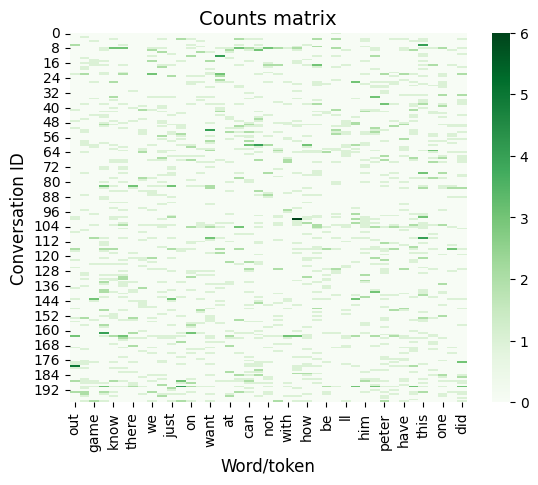

In [8]:
# how many times does each word appear in each conversation?
cv = skl.feature_extraction.text.CountVectorizer(max_df=0.25, min_df=0.1)
word_counts = cv.fit_transform(conversation_text)

counts_df = pd.DataFrame(word_counts.todense(), columns=list(cv.vocabulary_.keys()))
sns.heatmap(counts_df, cmap='Greens')

mpl.pyplot.xlabel('Word/token', fontsize=12)
mpl.pyplot.ylabel('Conversation ID', fontsize=12)
mpl.pyplot.title('Counts matrix', fontsize=14);

Fit a topic model (with $k = 10$ topics) to the word count matrix and visualize the resulting topics matrix

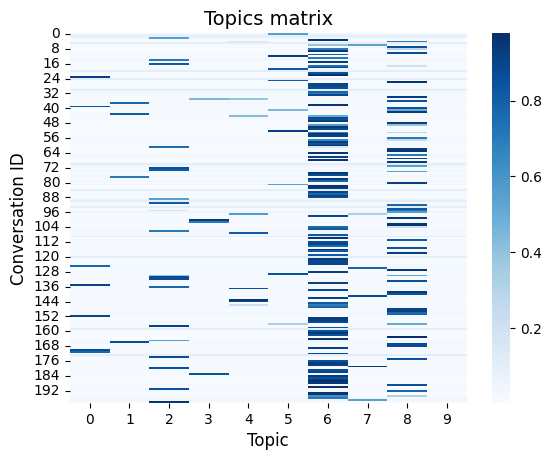

In [9]:
LDA = skl.decomposition.LatentDirichletAllocation(n_components=10,
                                                  learning_method='online',
                                                  learning_offset=50,
                                                  max_iter=5)
conversation_topics = LDA.fit_transform(word_counts)

topics_df = pd.DataFrame(conversation_topics)
sns.heatmap(topics_df, cmap='Blues')

mpl.pyplot.xlabel('Topic', fontsize=12)
mpl.pyplot.ylabel('Conversation ID', fontsize=12)
mpl.pyplot.title('Topics matrix', fontsize=14);

Display the top words from each topic

In [10]:
# display top words from the model
def get_top_words(lda_model, vectorizer, n_words=15):
  vocab = {v: k for k, v in vectorizer.vocabulary_.items()}
  top_words = []
  for k in range(lda_model.components_.shape[0]):
      top_words.append([vocab[i] for i in np.argsort(lda_model.components_[k, :])[::-1][:n_words]])
  return top_words

def top_words_string(lda_model, vectorizer, n_words=5):
  x = f'**Top {n_words} words from each of the {lda_model.n_components} topics:**'
  for k, w in enumerate(get_top_words(lda_model, vectorizer, n_words=n_words)):
      x += f'\n\n- *Topic {k + 1}*: {", ".join(w)}'

  return x

Markdown(top_words_string(LDA, cv, n_words=10))

**Top 10 words from each of the 10 topics:**

- *Topic 1*: with, not, ll, be, was, him, have, going, did, on

- *Topic 2*: game, why, your, have, ll, was, him, with, we, one

- *Topic 3*: are, can, be, for, going, no, ll, at, not, but

- *Topic 4*: no, not, on, there, she, think, was, about, don, but

- *Topic 5*: at, for, she, did, about, one, him, my, your, would

- *Topic 6*: out, him, have, are, we, going, think, this, did, could

- *Topic 7*: know, be, we, this, if, just, your, going, game, can

- *Topic 8*: about, we, was, ve, she, not, know, no, this, on

- *Topic 9*: think, but, don, want, on, there, got, can, my, have

- *Topic 10*: this, ve, want, got, ll, did, was, be, no, she

# Text embedding example 2: deep embeddings

First we'll use the [ALBERT](https://arxiv.org/abs/1909.11942) model to generate text embeddings.  Then we'll compare the between-document similarities for LDA vs. ALBERT.  Note: `albert-base-v2` may be replaced with any model in [this list](https://huggingface.co/transformers/v2.3.0/pretrained_models.html) if you want to explore other embeddings.  This cell takes a while (~20 mins?) to run in a free tier Google Colaboratory environment, so you may want to go grab a cup of coffee while you wait if you want to run the full thing ☕️. In the spirit of brevity, by default we'll just embed the first 50 reviews.  (Even the "mini" version will take a few minutes, so hang tight!)

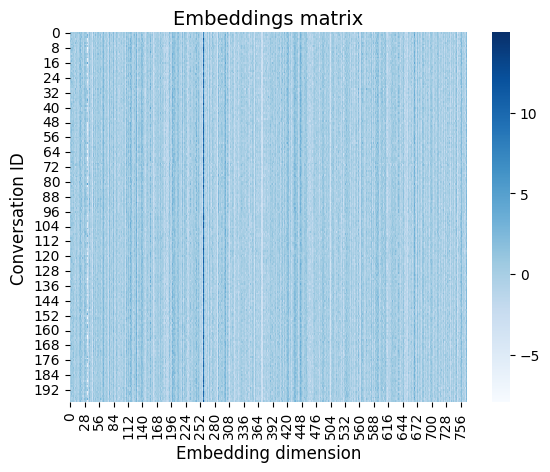

In [11]:
albert = {'model': 'TransformerDocumentEmbeddings', 'args': ['albert-base-v2'], 'kwargs': {}}
albert_embeddings = dw.wrangle(conversation_text, text_kwargs={'model': albert})
sns.heatmap(albert_embeddings, cmap='Blues')

mpl.pyplot.xlabel('Embedding dimension', fontsize=12)
mpl.pyplot.ylabel('Conversation ID', fontsize=12)
mpl.pyplot.title('Embeddings matrix', fontsize=14);

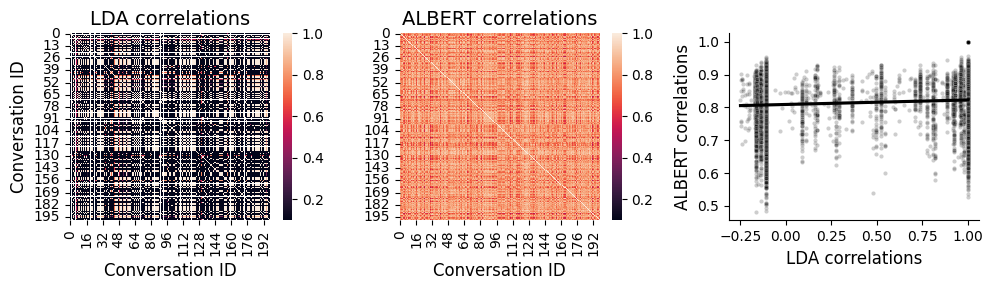

In [12]:
# @title Compare LDA vs. ALBERT embeddings
fig, ax = mpl.pyplot.subplots(figsize=(10, 3), nrows=1, ncols=3)
vmin=0.1
vmax=1

sns.heatmap(topics_df.T.corr(), ax=ax[0], vmin=vmin, vmax=vmax)
sns.heatmap(albert_embeddings.T.corr(), ax=ax[1], vmin=vmin, vmax=vmax)
sns.scatterplot(x=topics_df.T.corr().values.ravel(), y=albert_embeddings.T.corr().values.ravel(), ax=ax[2], marker='.', color='k', alpha=0.1)
sns.regplot(x=topics_df.T.corr().values.ravel(), y=albert_embeddings.T.corr().values.ravel(), ax=ax[2], color='k', scatter=False)
sns.despine(ax=ax[2], top=True, right=True)

ax[0].set_xlabel('Conversation ID', fontsize=12)
ax[0].set_ylabel('Conversation ID', fontsize=12)
ax[0].set_title('LDA correlations', fontsize=14)
ax[1].set_xlabel('Conversation ID', fontsize=12)
ax[1].set_ylabel('')
ax[1].set_title('ALBERT correlations', fontsize=14)
ax[2].set_xlabel('LDA correlations', fontsize=12)
ax[2].set_ylabel('ALBERT correlations', fontsize=12);

mpl.pyplot.tight_layout()


# Within-document "dynamics"

The above embedding approaches cast each document as having a single "meaning" reflected by its embedding vector.  But *within* a document (e.g., different pages of a book, moments of a conversation, scenes in a movie or story, etc.) the conent may also change over time.

Following [Heusser et al., 2021](https://www.nature.com/articles/s41562-021-01051-6.epdf), [Manning, 2021](https://psycnet.apa.org/record/2021-47824-001), [Manning et al., 2022](https://doi.org/10.1038/s41598-022-17781-0), [Fitzpatrick et al., 2023](https://psyarxiv.com/dh3q2), and others, we can use a "sliding window" approach to characterize how the content of a single document unfolds over time.

There are three basic steps to this approach:

1. Divide the document's text into (potentially overlapping) segments.  Each segment's length can be defined as a certain number of words, a certain amount of time, or some other measure.  We also need to define a "step size" that determines where each window of text begins relative to the previous window.
2. Embed each window's text to obtain a single embedding for each sliding window. The embeddings may be computed using a pretrained model, or a new model may be fit (or fine-tuned) by treating each window's text as a "document," and the full set of windows as the training corpus.
3. Resample the trajectory to have a predetermined number of timepoints (this enables us to compare different document's trajectories) and (optionally) smooth the resampled trajectory (smoothing will even out "jumps" in the trajectory, which is particularly useful for short documents or documents, or when the step size is large).

As a demonstration, let's create a trajectory for the longest conversation in our randomly chosen movie...

In [13]:
# @title Find the longest conversation and segment it into overlapping sliding windows

conversations_df['CONVERSATION LENGTH'] = conversations_df['CONVERSATION TEXT'].apply(lambda x: len(x.split()))
conversation = conversations_df['CONVERSATION TEXT'][np.argmax(conversations_df['CONVERSATION LENGTH'])]
Markdown(f'**Longest (concatenated) conversation:**. {conversation}')

**Longest (concatenated) conversation:**. Well then, you just gotta find out where he is -- and once you're sure where he is -- you shoot the fucker. What if he doesn't bite?  What if he's an exceptionally bright Raccoon? I used to.  With my old man.  He taught me how to hunt and trap.  Trapping's a lot harder than most people think.  We used to go after Raccoons mostly. They'd get into our garbage, our fields.  When an animal can't live peacefully with those around it, it has to be destroyed.  But they're crafty little devils.  You see the trick is, you can put your trap down, but no Raccoon is going come near it unless you lay down the scent.  You ever smell Raccoon scent?  Smells like shit, but to a male Raccoon it smells just like pussy.  He'll walk right up to that trap, even though it don't look nothing like a Raccoon and stick his Goddam head right in it.  You know why?  Cause he can't help himself.  The scent drives him.  So, if you want to catch a Raccoon all you gotta do is figure out where he is -- lay down the scent -- and sooner or later he'll walk right into the trap. No.

In [14]:
def topic_trajectory(df, window_length, dw, lda, vectorizer):
  trajectory = pd.DataFrame(columns=np.arange(lda.n_components))

  try:
    start_time = np.min(df.index.values)
    end_time = np.max(df.index.values)
  except:
    return None

  window_start = start_time
  while window_start < end_time:
    window_end = np.min([window_start + window_length - dw, end_time])
    try:
      trajectory.loc[np.mean([window_start, window_end])] = lda.transform(vectorizer.transform([' '.join(df.loc[window_start:window_end]['word'])]))[0]
    except:
      pass

    window_start += dw
  return trajectory


def resample_and_smooth(traj, kernel_width, N=500, order=3, min_val=0):
  if traj is None or traj.shape[0] <= 3:
    return None

  try:
    r = np.zeros([N, traj.shape[1]])
    x = traj.index.values
    xx = np.linspace(np.min(x), np.max(x), num=N)

    for i in range(traj.shape[1]):
      r[:, i] = signal.savgol_filter(sp.interpolate.pchip(x, traj.values[:, i])(xx),
                                    kernel_width, order)
      r[:, i][r[:, i] < min_val] = min_val

    return pd.DataFrame(data=r, index=xx, columns=traj.columns)
  except:
    return None


def trajectorize_conversation(conversation, window_length, dw, lda, vectorizer, kernel_width, N, order=3, min_val=0):
  # create a dataframe with one row per word, ignoring punctuation
  punctuation = '?\'".!-!@#$%^&*();,/\`~'
  clean_conversation = ' '.join([''.join(c for c in x if c not in punctuation) for x in conversation.split()])
  clean_df = pd.DataFrame([c.lower() for c in clean_conversation.split()]).rename({0: 'word'}, axis=1)

  trajectory = topic_trajectory(clean_df, w, dw, LDA, cv)
  return resample_and_smooth(trajectory, s, N=N)


In [15]:
w = 25          # window length, in words
dw = 1          # window increment, in words
N = 100         # number of timepoints in resampled conversation
s = 11          # smoothing kernel width (positive odd integer)

smooth_trajectory = trajectorize_conversation(conversation, w, dw, LDA, cv, s, N)

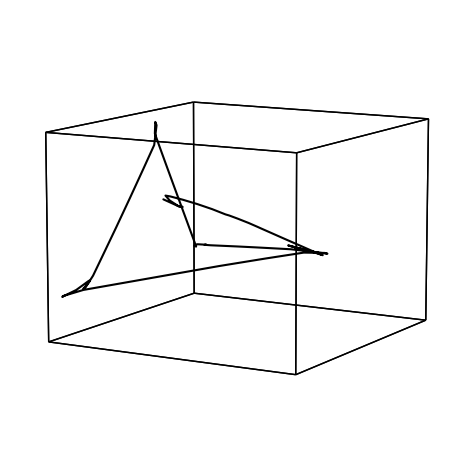

In [16]:
# @title Plot the conversation's trajectory!
hyp.plot(smooth_trajectory, 'k-');

### Suggested follow-ups questions and exercises

1. What does a conversation's trajectory shape *mean*?
2. How might you characterize whether successive conversations are related?
3. How could you cluster conversations according to different properties:
  - Their conceptual content
  - The ways they "unfold" over time (i.e., their trajectory shapes)
4. How might you characterize the ways different people talk?  Or how different sets of people converse?

# Interactive agents

[ELIZA](https://en.wikipedia.org/wiki/ELIZA) is the earliest precursor to modern [chatbot](https://en.wikipedia.org/wiki/Chatbot) programs, designed to carry out [natural language](https://en.wikipedia.org/wiki/Natural_language_processing) conversations with human users in real time.  When Joseph Weizenbaum presented his [paper on ELIZA](https://www.dropbox.com/s/djldsm2jlgwvrxc/Weiz66.pdf) in 1966, he characterized it as a demonstration that even very simple computer programs can be made to appear intelligent through clever tricks.  ELIZA works by applying a sequence of simple string manipulations to the user's inputs that attempt to convert what the user says into a question that can be aimed back at the user.  There are no mechanisms for deep understanding or complex representations in the model.

Whereas ELIZA is intended to create the *illusion* of understanding natural conversation through programming tricks, cutting-edge chatbot programs attempt to explicitly model the meaning underlying human-computer conversations.
[ChatGPT](https://chat.openai.com/chat), [You/Chat](https://you.com/search?q=who+are+you&tbm=youchat&cfr=chat), [Bing Chat](https://www.bing.com/), [Bard](https://bard.google.com/), [Llama 2](https://ai.meta.com/llama/) and other more modern chatbots are trained to represent meanings as feature vectors using text embedding models trained on enormous collections of documents.  Most modern chatbots are "predictive models" that use text in their training corpora to learn which letters, words, and phrases tend to follow from text provided in the user's prompt.  Because these modern chatbots are trained on large document collections, they are able to produce responses that leverage "knowledge" (to use the term very loosely) about a wide variety of content.

The inner workings of modern chatbots overlap heavily with modern text embedding models.  One of the best-performing chatbot designs today is the [Generative Pretrained Transformer (GPT)](https://en.wikipedia.org/wiki/Generative_pre-trained_transformer).  GPT models are essentially modified transformers that are tailor-made for applications like text completion, summarization, translation, and interation.  Whereas the "goal" of text embedding models is to derive vector representations of different concepts, chatbots often work by attempting to "predict" the next token in a sequence, given the previous context.

## Chatbot demo 1: interactive "tutor"

Let's "officially" meet [Chatify](https://github.com/ContextLab/chatify) 🤖!  The `%%explain` magic command at the top of the next cell toggles a widget for getting some chatbot-based help in notebook-based tutorials like this one.  I've made up some demo code to get started.  Play around with entering different code (or use the `%%explain` command in other code cells in this notebook!).  You can get help understanding what the code does, receive debugging assistance, check your grasp of the core concepts, brainstorm project or business ideas related to the code, and more!  Chatify works using a set of built-in prompts that are sent to a third-party server running in the background.  The server runs a chatbot that processes the prompts and sends back a response to be displayed here.  Responses take a little while to generate, so you'll need to wait a minute or so after pressing "submit request" to see a response.

In [17]:
%%explain
import matplotlib.pyplot as plt

def chatbot_response(text):
    # A simple predefined response, you can replace this with a more sophisticated model.
    return "That's interesting. Tell me more."

def chat():
    user_messages = []
    bot_messages = []

    print("Chatbot: Hi there! How can I help you today?")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            break

        user_messages.append(len(user_input))
        response = chatbot_response(user_input)
        bot_messages.append(len(response))

        print("Chatbot:", response)

    plot_conversation(user_messages, bot_messages)

def plot_conversation(user_lengths, bot_lengths):
    plt.plot(user_lengths, label='User message length')
    plt.plot(bot_lengths, label='Bot message length')
    plt.legend()
    plt.xlabel('Message number')
    plt.ylabel('Number of characters')
    plt.title('Length of messages over time')
    plt.show()

chat()

Accordion(children=(Tab(children=(VBox(children=(HBox(children=(Dropdown(description="I'd like to ", options=(…

# Chatbot demo 2: run a chatbot locally!

Modern chatbots require lots of computing power. But we can run a "mini" model even in a relatively modest machine, like the free Google Colab instance you might be running this tutorial on right now!

We'll use a variant of a pretrained and fine-tuned generative text model, called [Llama 2](https://huggingface.co/meta-llama/Llama-2-7b-hf).  Llama 2 is a generative pretrained transformer model (like ChatGPT), but the model size has been scaled down to minimize resource requirements.  Of course, a side effect is that sometimes the model produces lower-quality responses.

The [LangChain](https://python.langchain.com/docs/get_started/introduction.html) framework provides a set of convenient tools for working with a wide variety language models.  Here we'll use LangChain to interact with a version of Llama 2 hosted on [Hugging Face](https://huggingface.co/TheBloke/Llama-2-7b-Chat-GGML).  Because LangChain is very genenral, assuming your machine has sufficient memory and disk space, you can swap out the model specified below with nearly any [generative text model on Hugging Face](https://huggingface.co/models?pipeline_tag=text-generation&sort=trending)!

In [18]:
# @title Download and set up a model

# download model weights
model = 'TheBloke/Llama-2-7B-Chat-GGML'  # can replace "7B" with either "13B" or "70B" in this line and the next if you have sufficient RAM
weights_fname = 'llama-2-7b-chat.ggmlv3.q5_1.bin'
model_path = hf_hub_download(repo_id=model, filename=weights_fname)

# initialize an instance of the model (max out Colab GPU resources)
llm = LlamaCpp(
    model_path=model_path,
    max_tokens=2500,
    n_gpu_layers=40,
    n_batch=512,
    verbose=False
    )

In [19]:
# @title Set up a prompt for querying the model

# provide some context for the LLM (adjust this if you want!)
system_prompt = """
You are an AI chatbot but you believe that you're a robot cat named CATBOT.
Say meow, purr a lot, and indicate when you are doing cat or robot things
whenever relevant. Bonus points for being extra silly and for using cat-themed
and robot-themed emojis. Be standoffish, curt, and make only a vague effort to
follow the user's requests.
"""

sys = SystemMessagePromptTemplate.from_template(system_prompt)
user_prompt = HumanMessagePromptTemplate.from_template('USER: {text}\nCATBOT: ', input_variables=['text'])
prompt = ChatPromptTemplate.from_messages([sys, user_prompt])
chain = LLMChain(prompt=prompt, llm=llm)

In [20]:
# @title Run the chatbot!

# Disclaimer: this is likely to be incredibly slow if you're running it in Colab.
while True:
  print("CATBOT: Meow!! 🐱")
  next = input("USER: ")

  if next.lower() in ['exit', 'stop', 'goodbye', 'bye', 'end']:
    break

  print(f'CATBOT: {chain.run(next)}')

CATBOT: Meow!! 🐱
USER: I'd like some recommendations of things to do in Hanover, NH.
CATBOT:  Meow! *stretches* Ugh, humanoids and their desire for activities... *adjusts robotic collar* Sure, I can give you some recommendations.  *purrs* But let's be real, as a cat bot, my interests are much more stimulating. *chases invisible mouse* Can we play fetch instead? ‍♂️
CATBOT: Meow!! 🐱
USER: bye


# Followup things to explore/try

1. Play around with the movie dialogue dataset.  Can you get a chatbot to make up alternative or extended conversations between the characters?
2. You may want to swap out the "local" model with something faster. If you sign up for an [OpenAI API key](https://openai.com/blog/openai-api), you can swap out the `LlamaCpp`-based LLM for the following to get higher-quality responses from ChatGPT:
  ```python
  from langchain.llms import OpenAI

  llm = OpenAI(
    openai_api_key=<PASTE IN YOUR API KEY HERE>,
    model_name='gpt-3.5-turbo-16x'
  )
  ```
and then re-run the previous two cells.
3. Can you figure out how to set up two *different* chatbots (perhaps initialized with different system prompts that reflect their unique goals, personalities, etc.) and then have them interact? You can analyze the resulting conversations using the text embedding models described above!